# Exercise10: Web crawling, Big-O

Objectives:
+ Demonstate the ability to crawl webpages in breadth and depth first search
+ Estimate time complexity in Big-O notation from descriptions of algorithms

This exercise has two parts.  In Part A you will crawl a set of simple webpages in both breadth and depth first order.

In the second part, you will be given descriptions of algorithmic tasks and estimate the big-O time complexity of the algorithm.

In [1]:
%matplotlib inline
import requests
import scrapy

## Part A: Web crawling

I'd like you to crawl a "website".  The website that we're going to crawl is made up of color-named web pages.

I'd like you to write the algorithm to crawl this "website" in two different ways: using breadth-first search and then using depth-first search.

Use the algorithm outlines on the slides for today to assist you with this task.

The "root" of the website is the [green page](http://www.cse.msu.edu/~cse801a/exercise10/green.html).  Each of the web pages on this site only has links to other pages on the site, so you don't have to examine the URLs to make sure you stay on the website.

Starting with the "root" page, find traverse this website using the two methods.  

Keep track of the page titles and URLs as you traverse to avoid infinite loops from back-edges.

I want the output of each search to the the page titles in the order in which you traversed the website.

For your reference, the website has this link network:

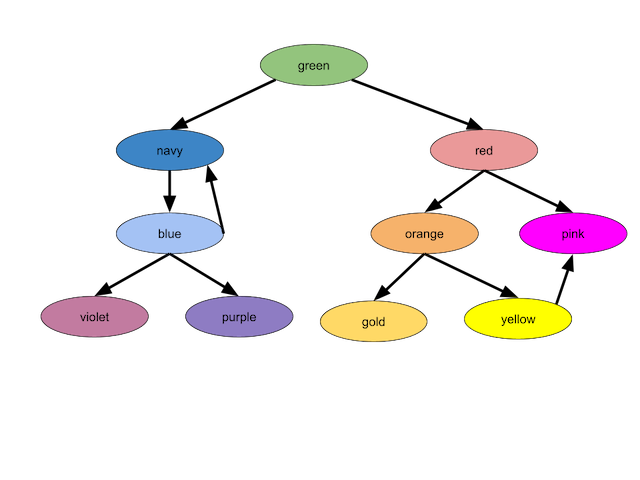

In [2]:
#Utlility functions
def add_base(url):
    return 'http://www.cse.msu.edu/~cse801a/exercise10/'+url

def fetch_links(url):
    html = requests.get(add_base(url)).content
    sel = scrapy.Selector(text = html)
    return sel.css("a::attr(href)").extract()

def get_html(url):
    return requests.get(add_base(url)).content    

In [3]:
#Breadth first
links_list_pop = ['green.html']
links_list = ['green.html']
while len(links_list_pop) > 0:
    base = links_list_pop.pop(0)
    for link in fetch_links(base):
        if link in links_list:
            continue
        else:
            links_list_pop.append(link)
            links_list.append(link)
    print(base)

green.html
navy.html
red.html
blue.html
orange.html
pink.html
violet.html
purple.html
gold.html
yellow.html


In [4]:
#Depth first
links_list_pop = ['green.html']
links_list = ['green.html']
while len(links_list_pop) > 0:
    base = links_list_pop.pop()
    for link in fetch_links(base):
        if link in links_list:
            continue
        else:
            links_list_pop.append(link)
            links_list.append(link)
    print(base)

green.html
red.html
pink.html
orange.html
yellow.html
gold.html
navy.html
blue.html
purple.html
violet.html


## Part B: Big-O

This part of the exercise does not involve coding.  Instead I will give you a written description of a task and its algorithm and you will provide a Big-O estimate of its time complexity.  Explain your answer.

### B1
Given a dataset with N records and M numerical attributes, what is the temporal complexity of finding the average of each attribute?

**Answer**:Time complexity to calculate average of 1 attribute is $O(N)$ since we loop through N observations. Since there are M attributes, total temporal complexity would be $O(M*N)$

### B2
Given a dataset with N records and M attributes, what is the temporal complexity of finding the pairwise-difference between one attribute against all N records?  (In other words, we want to find all pairs of the N records and find the difference of a single attribute from each of the pair.)

**Answer**: Time complexity to get the difference of one attribute against other attribute is $O(N)$ as there are N records. Since we need to take pairwise difference between one attributes and remaining M-1 attributes, the time xomplexity would be $O(N * (M-1))$

### B3

Given K strings of size N with M symbols, what is the temporal complexity to count how many times a single character appears in the strings?

**Answer**: 

The time complexity to count one character in a string of N size is $O(N)$.

The time complexity to count one character in K strings is $O(K * N)$

The time complexity to count how many times M symbols occured in K strings of N size would be $O(K * N * M)$

### B4
Given N records with M numerical attributes, we'd like to find the average of K records over all attributes.  If it takes log(N) time to look up each records, what is the temporal computational complexity of this task?

**Answer**:

Temporal complexity to look up K records n one attribute is $O(logK)$

Temporal complexity to look up and average K records is also $O(logK)$ as we can sum the records to an initialized value after looking up instead of making another loop.

Temporal complexity to average K records over M attributes would be $O(M * logK)$